In [1]:
from qiskit import *
import numpy as np
from numpy import pi

In [2]:
detuning = 3
signal_strength = 2
dt = 0.3

Gamma = 1

theta = 2 * np.arcsin(np.sqrt(Gamma * dt))

z_arg = -detuning * dt / 2
y_arg = -signal_strength * dt

qreg_q = QuantumRegister(2, "q")
creg_c = ClassicalRegister(1, "c")

qc = QuantumCircuit(qreg_q, creg_c)

for _ in range(1000):
    qc.u(z_arg, y_arg, z_arg, qreg_q[0])

    qc.cu(theta, 0, 0, theta, qreg_q[0], qreg_q[1])
    qc.cx(qreg_q[1], qreg_q[0])
    qc.measure(qreg_q[1], creg_c[0])
    qc.reset(qreg_q[1])

qc.measure_all()

# qc.draw(fold=100)


In [3]:
from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()

qc_compiled = transpile(qc, backend)

job_sim = backend.run(qc_compiled, shots=8192)
result_sim = job_sim.result()
result_sim.get_counts()

{'00 0': 4817, '00 1': 1073, '01 0': 2302}

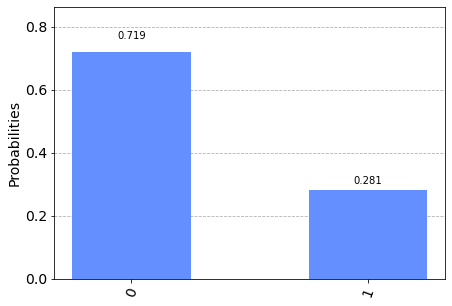

In [4]:
from qiskit.visualization import plot_histogram

# Plot counts just for main qubit
counts = result_sim.get_counts()
counts = {"0": counts["00 0"] + counts["00 1"], "1": counts["01 0"]}

plot_histogram(counts)

In [5]:
import qiskit.tools.jupyter
%qiskit_version_table